### WordCloud 制作词云

整个过程分为几个步骤：

- 文件加载
- 分词
- 统计词频
- 去停用词
- 构建词云

In [1]:
#引入所需要的包
import jieba
import pandas as pd 
import numpy as np
from scipy.misc import imread 
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
#定义文件路径
dir =  "C://Users//lihuichuan//Desktop//NLP//NLP_pratice//lda//"
#定义语料文件路径
file = "".join([dir,"z_m.csv"])
#定义停用词文件路径
stop_words = "".join([dir,"stopwords.txt"])
#定义wordcloud中字体文件的路径
simhei = "".join([dir,"simhei.ttf"])
#读取语料
df = pd.read_csv(file, encoding='utf-8')
df.head(10)

,content
0,1.日本政府3月23日在内阁会议上决定对中国和韩国产的部分钢铁产品征收反倾销关税。征税对象为...
1,2.新华社3月23日消息，美国总统特朗普22日签署总统备忘录，依据“301调查”结果，将对从...
2,3.当地时间3月22日，美国政府宣布，根据301调查结果，计划将对至少500亿美元的中国进口...
3,4.当地时间3月22日，美国酝酿对中国约总价值600亿美元（约合人民币3743.4亿元）的1...
4,5.北京时间今天（3月23日）凌晨，美国打响了对华贸易战的第一枪。美国总统特朗普签署备忘录，...
5,6.中美贸易战重创A股市场 近20家上市公司紧急回应当天，三大股指集体大幅低开，盘中均尝试反...
6,7.贸易战将主要影响哪些领域？在具体涉及的领域方面：从签署备忘录来看首当其冲是针对中国计划加...
7,8.国总统特朗普签署总统备忘录，依据“301调查”结果，将对从中国进口的商品大规模征收关税，...
8,9.如果中国要在中美贸易战中不受影响，如果中国在发生了贸易战之后没有从其他国家（美国除外）增...
9,10.央广网北京5月11日消息商务部昨天（10号）表示，今年前4个月外贸进出口继续稳中向好，...


In [2]:
#如果存在nan，删除
df.dropna(inplace=True)
#将content一列转为list
content=df.content.values.tolist()
#用jieba进行分词操作
segment=[]

In [3]:
for line in content:
    try:
        segs=jieba.cut_for_search(line)
        segs = [v for v in segs if not str(v).isdigit()]#去数字
        segs = list(filter(lambda x:x.strip(), segs))   #去左右空格
        #segs = list(filter(lambda x:len(x)>1, segs)) #长度为1的字符
        for seg in segs:
            if len(seg)>1 and seg!='\r\n':
                segment.append(seg)
    except:
        print(line)
        continue
print(segs)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\LIHUIC~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.690 seconds.
Prefix dict has been built succesfully.


['.', '央广网', '北京', '月', '日', '消息', '商务', '商务部', '昨天', '（', '号', '）', '表示', '，', '今年', '前', '个', '月', '外贸', '进出', '出口', '进出口', '继续', '稳中', '向', '好', '，', '预计', '全年', '都', '将', '保持', '这一', '势头', '，', '中方', '同意', '在', '适当', '时', '就', '中美', '贸易', '摩擦', '问题', '赴美', '进行', '磋商', '。', '海关', '数据', '显示', '，', '今年', '前', '个', '月', '我国', '进出', '出口', '进出口', '总额', '达', '9.11', '万亿', '亿元', '万亿元', '，', '同比', '增长', '8.9%', '，', '针对', '进口', '增幅', '高于', '出口', '5.3', '个', '百分', '分点', '百分点', '，', '贸易', '顺差', '贸易顺差', '收窄', '24.1%', '，', '进出', '出口', '进出口', '数值', '更趋', '平衡', '，', '商务', '商务部', '新闻', '发言', '发言人', '高峰', '认为', '，', '这', '与', '中国', '主动', '扩大', '进口', '不可', '可分', '密不可分', '。', '高峰', '：', '主动', '扩大', '进口', '，', '是', '我们', '推动', '对外', '外贸', '贸易', '对外贸易', '平衡', '发展', '的', '重要', '举措', '，', '也', '是', '我国', '产业', '升级', '、', '满足', '消费', '消费者', '对', '高质', '质量', '高质量', '生活', '需求', '的', '必然', '要求', '。', '贸易', '顺差', '贸易顺差', '不是', '我们', '的', '目标', '，', '我们', '希望', '中国', '对外', '外贸', '贸易', '对外贸易', '发展', '不仅', '能',

In [4]:
words_df=pd.DataFrame({'segment':segment})
#加载停用词
stopwords=pd.read_csv(stop_words,index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')               
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":np.size})
print(words_stat)
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)

               计数
segment          
10%             2
10487.09        1
12%             1
1759.16         1
20%             1
24.1%           1
25%             2
3.20%           1
3.27%           1
3.59%           1
30%             1
3156.89         1
3743.4          1
4.4%            1
41.8            1
48%             1
5%              1
5.3             1
5.8%            1
6.4%            1
69.2%           1
7%              2
8.9%            1
9.11            1
A股              1
Council         1
Horticultural   1
Northwest       1
WTO             1
一些              1
...            ..
铁路              1
问题              4
附加              1
限制              4
除外              1
陪到              1
随后              2
集中              1
集体              2
需求              1
非常              1
韩国              1
顺差              2
预计              2
领域              4
首先              1
首当              2
首当其冲            2
马克              1
驻美              1
高于              1
高峰              3
高科技       

C:\Users\lihuichuan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


In [5]:
words_stat=words_stat[~words_stat.segment.isin(stopwords.stopword)]


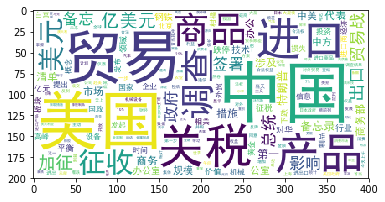

In [6]:
#下面是重点，绘制wordcloud词云，这一提供2种方式
#第一种是默认的样式
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud=WordCloud(font_path=simhei,background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)
wordcloud.to_file(r'wordcloud_1.jpg')  #保存结果
